In [1]:
import os,shutil

In [2]:
base_dir = '/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/data/cats-dogs-dataset'

In [3]:
#directories for our training, test and validation splits
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)
val_dir = os.path.join(base_dir,'validation')
os.mkdir(val_dir)

In [4]:
#directory with our training cat pictures
train_cats_dir = os.path.join(train_dir,'cats')
# os.mkdir(train_cats_dir)

#directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir,'dogs')
# os.mkdir(train_dogs_dir)

#directory with our testing cat pictures
test_cats_dir = os.path.join(test_dir,'cats')
# os.mkdir(test_cats_dir)

#directory with our testing dog pictures
test_dogs_dir = os.path.join(test_dir,'dogs')
# os.mkdir(test_dogs_dir)

#directory with our validation cat pictures
val_cats_dir = os.path.join(val_dir,'cats')
# os.mkdir(val_cats_dir)

#directory with our validation dog pictures
val_dogs_dir = os.path.join(val_dir,'dogs')
# os.mkdir(val_dogs_dir)

In [ ]:
src_path = os.path.join(base_dir,'train1')
len(os.listdir(src_path))

25000

In [6]:
os.listdir(src_path)[:3]

['dog.9000.jpg', 'dog.9001.jpg', 'dog.9002.jpg']

In [7]:
#copy first 1000 cat images to train_cats_dir
#mtd1                                                                #mtd2
#if we don't want to update image name in destination directory      #if we want to update image image
for i in range(1000):                                                # for i in range(1000):
  img_name = 'cat.%d.jpg'%i                                          #   img_name = 'cat.%d.jpg'%i
  src = os.path.join(src_path,img_name)                              #   new_img_name = 'abcd.%d.png'%i
  shutil.move(src,train_cats_dir)                                    #   src = os.path.join(src_path,img_name)
                                                                     #   des = os.path.join(train_cats_dir,new_img_name)
                                                                     #   shutil.move(src,des)
#copy next 500 cat images to test_cats_dir
for i in range(1000,1500):
  img_name = 'cat.%d.jpg'%i
  src = os.path.join(src_path,img_name)
  shutil.move(src,test_cats_dir)

#copy next 500 cat images to val_cats_dir
for i in range(1500,2000):
  img_name = 'cat.{}.jpg'.format(i)
  src = os.path.join(src_path,img_name)
  shutil.move(src,val_cats_dir)

In [8]:
#copy first 1000 dog images to train_dogs_dir
for i in range(302,1000):
  img_name = 'dog.%d.jpg'%i
  src = os.path.join(src_path,img_name)
  shutil.move(src,train_dogs_dir)

#copy next 500 dog images to test_dogs_dir
for i in range(1000,1500):
  img_name = 'dog.%d.jpg'%i
  src = os.path.join(src_path,img_name)
  shutil.move(src,test_dogs_dir)

#copy next 500 dog images to val_dogs_dir
for i in range(1500,2000):
  img_name = 'dog.{}.jpg'.format(i)
  src = os.path.join(src_path,img_name)
  shutil.move(src,val_dogs_dir)

In [9]:
print(len(os.listdir(train_cats_dir)),len(os.listdir(train_dogs_dir)))
print(len(os.listdir(test_cats_dir)),len(os.listdir(test_dogs_dir)))
print(len(os.listdir(val_cats_dir)),len(os.listdir(val_dogs_dir)))

1000 1000
500 500
500 500


In [10]:
src_path = os.path.join(base_dir,'train1')
len(os.listdir(src_path))

21000

## **Building our Network**

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D,Flatten,Dense
model = Sequential()

In [12]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3) ))
model.add( MaxPool2D( (2,2) ) )
model.add(Conv2D(64,(3,3),activation='relu'))
model.add( MaxPool2D( (2,2) ) )
model.add(Conv2D(128,(3,3),activation='relu'))
model.add( MaxPool2D( (2,2) ) )
model.add(Conv2D(128,(3,3),activation='relu'))
model.add( MaxPool2D( (2,2) ) )
model.add(Flatten())
model.add(Dense(128,activation ='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
#All images will be rescaled by a factor of 255
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [17]:
train_gen = train_data_gen.flow_from_directory(train_dir,batch_size=20,
                                               target_size=(150,150), # All images will be resized to 150x150
                                               class_mode='binary')#since we use binary_crossentropy loss, we need binary labels
#while running this cell make sure it shows 2 classes
#if it shows 3 then remove.ipynb_checkpoints/

Found 2000 images belonging to 2 classes.


In [18]:
test_gen = test_data_gen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [21]:
#These generators yields batches of 150x150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). 
#20 is the number of samples in each batch (the batch size)

In [20]:
#generators just loops endlessly over the images present in the target folder. 
#For this reason, we need to break the iteration loop at some point.

for data_batch,label_batch in train_gen:
  print('data batch shape: ',data_batch.shape)
  print('label batch shape: ',label_batch.shape)
  break

data batch shape:  (20, 150, 150, 3)
label batch shape:  (20,)


In [22]:
 #train                              #batch_size * steps_per_epoch(or no of batches) = data_in_training_set
                                     #20         *   100                             =  2000

#validation                          #batch_size * validation_steps(or no of batches) = data_in_validation_set 
                                     #20         *   50                               =  1000
                                     
model.fit_generator(train_gen,epochs=30,steps_per_epoch=100,validation_data=test_gen,validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 1762s 18s/step - loss: 0.7010 - acc: 0.5114 - val_loss: 0.6915 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 95s 954ms/step - loss: 0.6922 - acc: 0.5072 - val_loss: 0.7182 - val_acc: 0.5070
Epoch 3/30
100/100 [==============================] - 96s 964ms/step - loss: 0.6748 - acc: 0.5744 - val_loss: 0.6535 - val_acc: 0.6230
Epoch 4/30
100/100 [==============================] - 96s 962ms/step - loss: 0.6510 - acc: 0.6061 - val_loss: 0.6763 - val_acc: 0.5660
Epoch 5/30
100/100 [==============================] - 97s 966ms/step - loss: 0.6303 - acc: 0.6525 - val_loss: 0.6230 - val_acc: 0.6550
Epoch 6/30
100/100 [==============================] - 97s 967ms/step - loss: 0.6035 - acc: 0.6996 - val_loss: 0.6198 - val_acc: 0.6560
Epoch 7/30
100/100 [==============================] - 97s 966ms/step - loss: 0.5647 - acc: 0.7037 - val_loss: 0.7296 - val_acc: 0.5930
Epoch 8/30
100/100 [==============================] - 9

In [23]:
model.save('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/models/cats_dogs_1.h5')

# **Model Evaluation**

In [24]:
dict_ = model.history.history
dict_.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [26]:
train_acc = dict_['acc']
train_loss = dict_['loss']
val_acc = dict_['val_acc']
val_loss = dict_['val_loss']
epochs = range(1,len(train_acc)+1)

**Training v/s Validation**

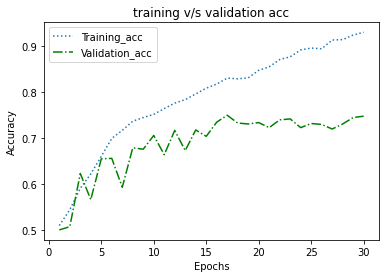

In [27]:
import matplotlib.pyplot as plt

plt.plot(epochs,train_acc,ls=':',label='Training_acc')
plt.plot(epochs,val_acc,ls='-.',color='green',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation acc')
plt.legend()

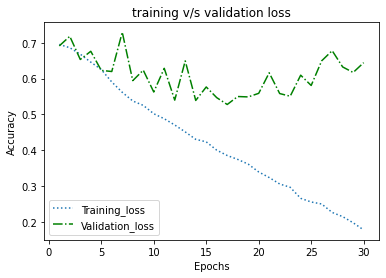

In [28]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation loss')
plt.legend()

In [29]:
#These plots are characteristic of overfitting. Our training accuracy increases linearly over time, until it reaches nearly 100%,
#while our validation accuracy stalls at 70-75%. 
#Our validation loss reaches its minimum after only five epochs then stalls, while the training loss keeps decreasing linearly until it reaches nearly 0.

In [30]:
#Because we only have relatively few training samples (2000), overfitting is going to be our number one concern. 
#Let's mitigate overfitting using data augmentation.

# **Data Augmentation**

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                    height_shift_range=0.2,
                                    width_shift_range=0.2,
                                    rotation_range=40,
                                    shear_range=0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',)

#Note that the validation data shouldn't be augmented..!
test_datagen = ImageDataGenerator(rescale=1./255)

In [45]:
train_gen = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
val_gen   = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# **Network Building**

In [31]:
from keras.models import Sequential
from keras.layers import Dropout
model2 = Sequential()

In [35]:
model2.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3) ))
model2.add(MaxPool2D((2,2)))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPool2D((2,2)))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPool2D((2,2)))
model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPool2D((2,2)))
model2.add(Flatten())
model2.add(Dropout(0.4))
model2.add(Dense(128,activation ='relu'))
model2.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [37]:
model2.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])

In [46]:
model2.fit_generator(train_gen,epochs=40,steps_per_epoch=100,validation_data=val_gen,validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
100/100 [==============================] - 91s 906ms/step - loss: 1.3491 - acc: 0.0190 - val_loss: 1.3169 - val_acc: 0.0130
Epoch 2/40
100/100 [==============================] - 90s 903ms/step - loss: 1.3418 - acc: 0.0250 - val_loss: 1.3498 - val_acc: 0.0510
Epoch 3/40
100/100 [==============================] - 91s 907ms/step - loss: 1.3311 - acc: 0.0230 - val_loss: 1.3058 - val_acc: 0.0120
Epoch 4/40
100/100 [==============================] - 90s 903ms/step - loss: 1.3321 - acc: 0.0350 - val_loss: 1.3063 - val_acc: 0.1050
Epoch 5/40
100/100 [==============================] - 91s 907ms/step - loss: 1.3173 - acc: 0.0355 - val_loss: 1.2933 - val_acc: 0.0320
Epoch 6/40
100/100 [==============================] - 91s 905ms/step - loss: 1.3266 - acc: 0.0210 - val_loss: 1.2864 - val_acc: 0.0130
Epoch 7/40
100/100 [==============================] - 91s 909ms/step - loss: 1.3175 - acc: 0.0230 - val_loss: 1.3233 - val_acc: 0.0050
Epoch 8/40
100/100 [==============================] - 9

In [49]:
model2.save('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/models/cats_dogs_2_with_data_augmentation.h5')

# **Model Evaluation**

**Training v/s Validation**

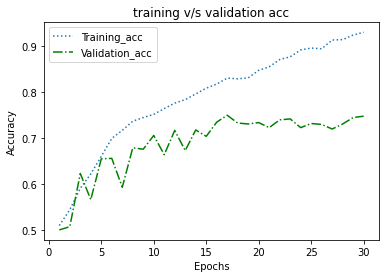

In [50]:
plt.plot(epochs,train_acc,ls=':',label='Training_acc')
plt.plot(epochs,val_acc,ls='-.',color='green',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation acc')
plt.legend()

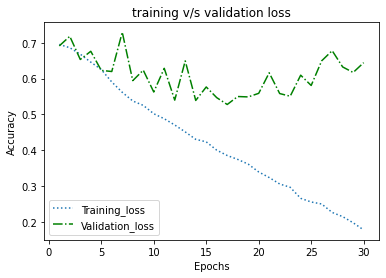

In [51]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation loss')
plt.legend()